In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### Generating data randomly
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100, 1)

Text(0.5, 1.0, 'X vs Y')

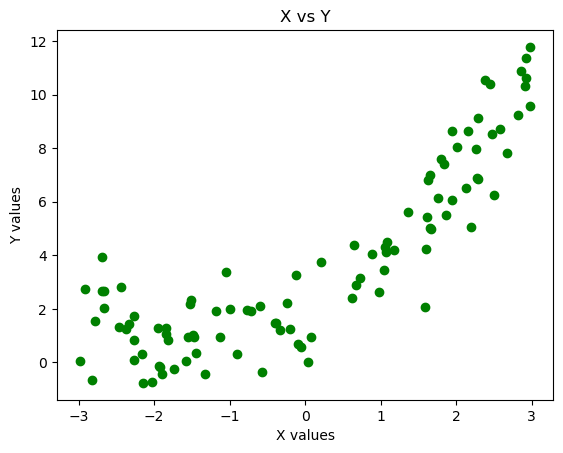

In [3]:
plt.scatter(X, y, color='g')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('X vs Y')

In [5]:
### Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
### Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
### Create and train the model
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [8]:
regression.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = regression.predict(X_test)

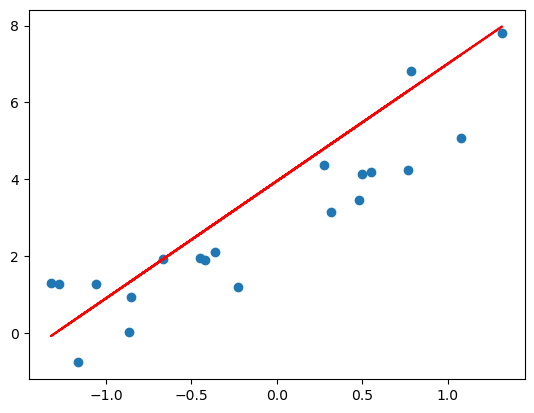

In [10]:
#### Plot the scatterplot for ypred and actual y
plt.plot(X_test, y_pred, color='r')
plt.scatter(X_test, y_test)

In [11]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.640530802025124


In [12]:
### We will slve this problem using polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [27]:
# Fit the PolynomialFeatures transformer with degree=2
poly = PolynomialFeatures(degree=3, include_bias=True)

# Fit the transformer to the training data
X_train_poly = poly.fit_transform(X_train)

# Transform both the training and test data
X_test_poly = poly.transform(X_test)

In [28]:
## Conduct the regression analysis again
regression_poly = LinearRegression()

In [29]:
regression_poly.fit(X_train_poly, y_train)
y_pred = regression_poly.predict(X_test_poly)

In [30]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.7452704584443746


In [31]:
print(regression_poly.coef_)

[[ 0.          3.15071242  1.99927809 -0.0046707 ]]


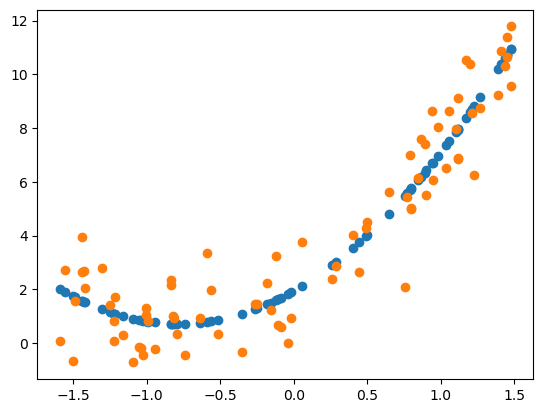

In [32]:
plt.scatter(X_train, regression_poly.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [34]:
### Prediction of new data 

X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)

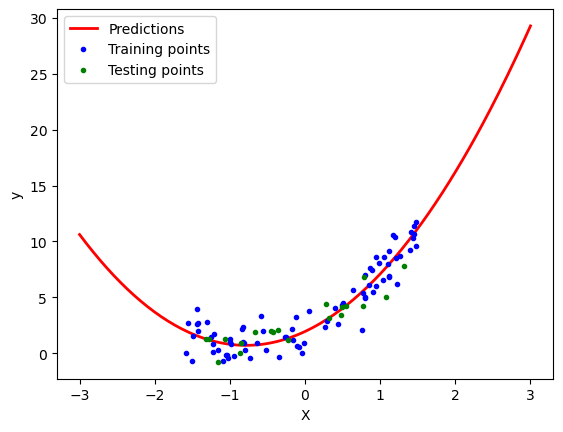

In [39]:
y_new = regression_poly.predict(X_new_poly)
plt.plot(X_new, y_new, "r", linewidth = 2, label ="Predictions")
plt.plot(X_train, y_train, "b.", label='Training points')
plt.plot(X_test, y_test, "g.", label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [41]:
### Learning about pipelining

from sklearn.pipeline import Pipeline

In [42]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ('poly_features', poly_features), 
        ('lin_reg', lin_reg)
    ])
    poly_regression.fit(X_train, y_train)
    y_pred_new = poly_regression.predict(X_new)
    ## Plotting the line 
    plt.plot(X_new, y_pred_new, "r", linewidth = 2, label ="Predictions")
    plt.plot(X_train, y_train, "b.", label='Training points')
    plt.plot(X_test, y_test, "g.", label='Testing points')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend(loc="upper left")
    plt.axis([-4, 4, 0, 10])
    plt.show()
        

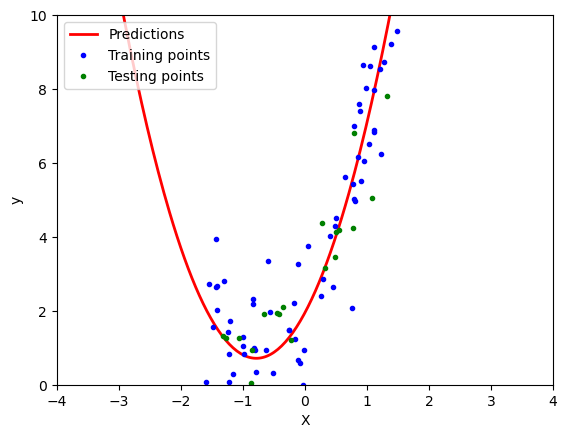

In [47]:
poly_regression(3)